In [ ]:
# %%bash
# git clone https://github.com/jeya-maria-jose/UNeXt-pytorch
# cd UNeXt-pytorch

# pip install -q condacolab

!cp -r /content/drive/MyDrive/UNeXt-pytorch ./

In [ ]:
!mkdir ./drive/MyDrive/dataset
!mkdir ./Dataset
!tar -xf /content/drive/MyDrive/Task02_Heart.tar -C ./Dataset
!mkdir data
!mkdir data/train
!mkdir data/train/image
!mkdir data/train/label
!mkdir data/test
!mkdir data/test/image
!mkdir data/test/label

import os

import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from glob import glob

# Use 24, 26, 29, 30 dataset as test
input_path = "./Dataset/Task02_Heart/*Tr/"

testset_name = ["la_024.nii.gz", "la_026.nii.gz", "la_029.nii.gz", "la_030.nii.gz"]
testset = ["./Dataset/Task02_Heart/imagesTr/" + data for data in testset_name]
testset += ["./Dataset/Task02_Heart/labelsTr/" + data for data in testset_name]
trainset = [data for data in glob(input_path + "*.nii.gz") if data not in testset]

def save_png_from_nii(dataPath:list, train:bool):
  path = "./data/train/" if train else "./data/test/"
  for data in dataPath:
    image = "image/" if "images" in data else "label/"
    proxy = nib.load(data)
    arr = proxy.get_fdata()
    nii_image = nib.Nifti1Image(arr, proxy.affine, proxy.header)
    data_number = int(data.split(".")[1][-3:])
    count = arr.shape[2]
    for i in range(count):
      matplotlib.image.imsave(path + image + "%d_%d.png"%(data_number, i), arr[:,:,i])


import os
if not os.path.exists("./data/train/image/19_0.png"):
  save_png_from_nii(trainset, True)
  save_png_from_nii(testset, False)

mkdir: cannot create directory ‘./drive/MyDrive/dataset’: File exists


In [ ]:
!mv ./data/train/label/* ./inputs/train/masks/0/

mv: target './inputs/train/masks/0/' is not a directory


In [ ]:
%cd UNeXt-pytorch

test= "addict\n\
dataclasses\n\
numpy\n\
opencv-python\n\
perceptual\n\
pillow\n\
scikit-image\n\
scipy\n\
tifffile\n\
timm\n\
torch\n\
torchvision\n\
typing-extensions\n\
yapf"

open("./requirements.txt", "w").write(test)



!pip install -r requirements.txt

/content/UNeXt-pytorch
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 35.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (1

In [ ]:
%cd UNeXt-pytorch
!rm -rf ./inputs
!mkdir /content/data/train/masks /content/data/train/masks/0
!mkdir /content/data/test/masks /content/data/test/masks/0
!mv /content/data/train/image /content/data/train/images
!mv /content/data/train/label/* /content/data/train/masks/0
!mv /content/data/test/image /content/data/test/images
!mv /content/data/test/label/* /content/data/test/masks/0
!mv /content/data /content/UNeXt-pytorch
!mkdir ./inputs
!mv ./data/train ./inputs
!mv ./data/test ./inputs

[Errno 2] No such file or directory: 'UNeXt-pytorch'
/content/UNeXt-pytorch
mkdir: cannot create directory ‘/content/data/train/masks’: No such file or directory
mkdir: cannot create directory ‘/content/data/train/masks/0’: No such file or directory
mkdir: cannot create directory ‘/content/data/test/masks’: No such file or directory
mkdir: cannot create directory ‘/content/data/test/masks/0’: No such file or directory
mv: cannot stat '/content/data/train/image': No such file or directory
mv: cannot stat '/content/data/train/label/*': No such file or directory
mv: cannot stat '/content/data/test/image': No such file or directory
mv: cannot stat '/content/data/test/label/*': No such file or directory
mv: cannot stat '/content/data': No such file or directory


In [ ]:
# !mv ./inputs/train/masks/0/label/* ./inputs/train/masks/0/
# !mv ./inputs/test/masks/0/* ./inputs/train/masks/0/
# !mv ./inputs/test/images/* ./inputs/train/images/

mv: cannot stat './inputs/train/masks/0/label/*': No such file or directory
mv: cannot stat './inputs/test/masks/0/*': No such file or directory


In [ ]:
%cd UNeXt-pytorch
!python train.py --dataset train --arch UNet --name segment_unet --img_ext .png --mask_ext .png --lr 0.0001 --epochs 50 --input_w 256 --input_h 256 --b 16

[Errno 2] No such file or directory: 'UNeXt-pytorch'
/content/UNeXt-pytorch
--------------------
name: segment_unet
epochs: 50
batch_size: 16
arch: UNet
deep_supervision: False
input_channels: 3
num_classes: 1
input_w: 256
input_h: 256
loss: BCEDiceLoss
dataset: train
img_ext: .png
mask_ext: .png
optimizer: Adam
lr: 0.0001
momentum: 0.9
weight_decay: 0.0001
nesterov: False
scheduler: CosineAnnealingLR
min_lr: 1e-05
factor: 0.1
patience: 2
milestones: 1,2
gamma: 0.6666666666666666
early_stopping: -1
cfg: None
num_workers: 4
--------------------
--------------------
Train dataset size : 1449, Valid dataset size : 363
--------------------
Epoch [0/50]
100% 90/90 [00:37<00:00,  2.40it/s, loss=1.07, iou=0.196]
100% 23/23 [00:04<00:00,  4.91it/s, loss=1.05, iou=2.53e-9, dice=5.07e-9]
loss 1.0670 - iou 0.1958 - val_loss 1.0541 - val_iou 0.0000
=> saved best model
Epoch [1/50]
100% 90/90 [00:28<00:00,  3.12it/s, loss=1.05, iou=0.374]
100% 23/23 [00:02<00:00,  8.81it/s, loss=1.05, iou=0.337, di

In [ ]:
%cd UNeXt-pytorch
!python val.py --name segment_unet

[Errno 2] No such file or directory: 'UNeXt-pytorch'
/content/UNeXt-pytorch
--------------------
arch: UNet
batch_size: 16
cfg: None
dataset: test
deep_supervision: False
early_stopping: -1
epochs: 50
factor: 0.1
gamma: 0.6666666666666666
img_ext: .png
input_channels: 3
input_h: 256
input_w: 256
loss: BCEDiceLoss
lr: 0.0001
mask_ext: .png
milestones: 1,2
min_lr: 1e-05
momentum: 0.9
name: segment_unet
nesterov: False
num_classes: 1
num_workers: 4
optimizer: Adam
patience: 2
scheduler: CosineAnnealingLR
weight_decay: 0.0001
--------------------
=> creating model UNet
100% 29/29 [00:08<00:00,  3.44it/s]
IoU: 0.8052
Dice: 0.8915


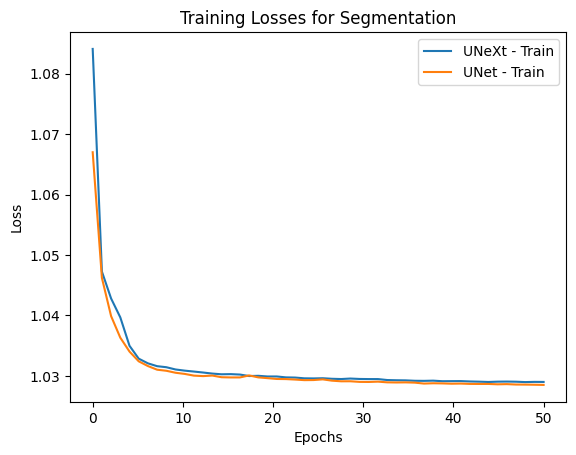

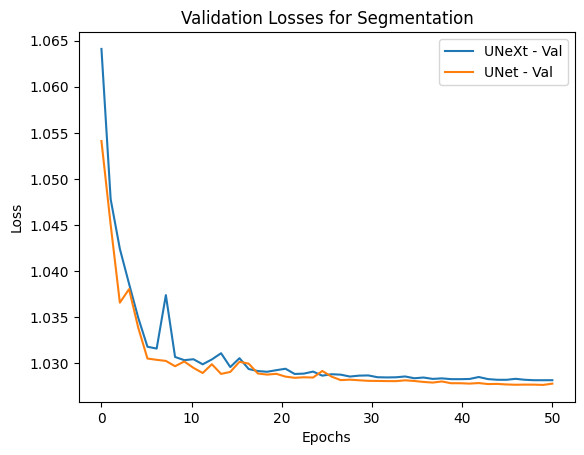

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

unext = pd.read_csv("./models/segment/log.csv")
unet = pd.read_csv("./models/segment_unet/log.csv")

unext_training = unext['loss']
unet_training = unet['loss']
unext_val = unext['val_loss']
unet_val = unet['val_loss']

x = np.linspace(0, 50, 50)

fig = plt.figure()
plt.title("Training Losses for Segmentation")
plt.plot(x, unext_training)
plt.plot(x, unet_training)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(('UNeXt - Train','UNet - Train'))


fig2 = plt.figure()
plt.title("Validation Losses for Segmentation")
plt.plot(x, unext_val)
plt.plot(x, unet_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(('UNeXt - Val','UNet - Val'))

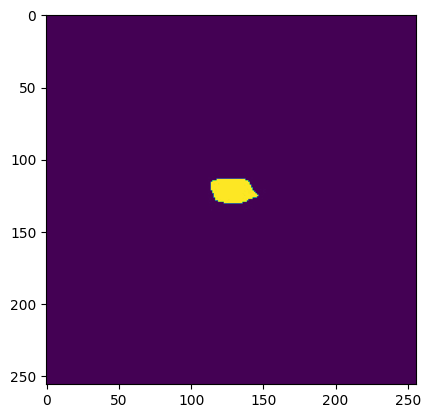

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./outputs/segment/0/24_83.jpg").convert("L")
plt.imshow(img)

In [ ]:
!ls ./inputs/test/masks/0/ | wc -l

459


In [ ]:
!mkdir /content/drive/MyDrive/UNeXt-pytorch
!cp -r ./models/segment /content/drive/MyDrive/UNeXt-pytorch/models

In [ ]:
!cp -r ./ /content/drive/MyDrive/UNeXt-pytorch/